In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings      
warnings.filterwarnings("ignore")
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape

(614, 13)

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

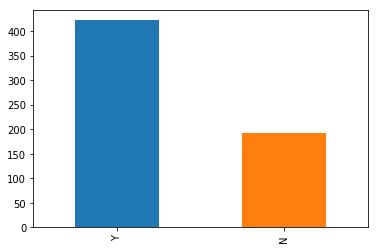

In [10]:
train['Loan_Status'].value_counts().plot.bar()

Univariate analysis

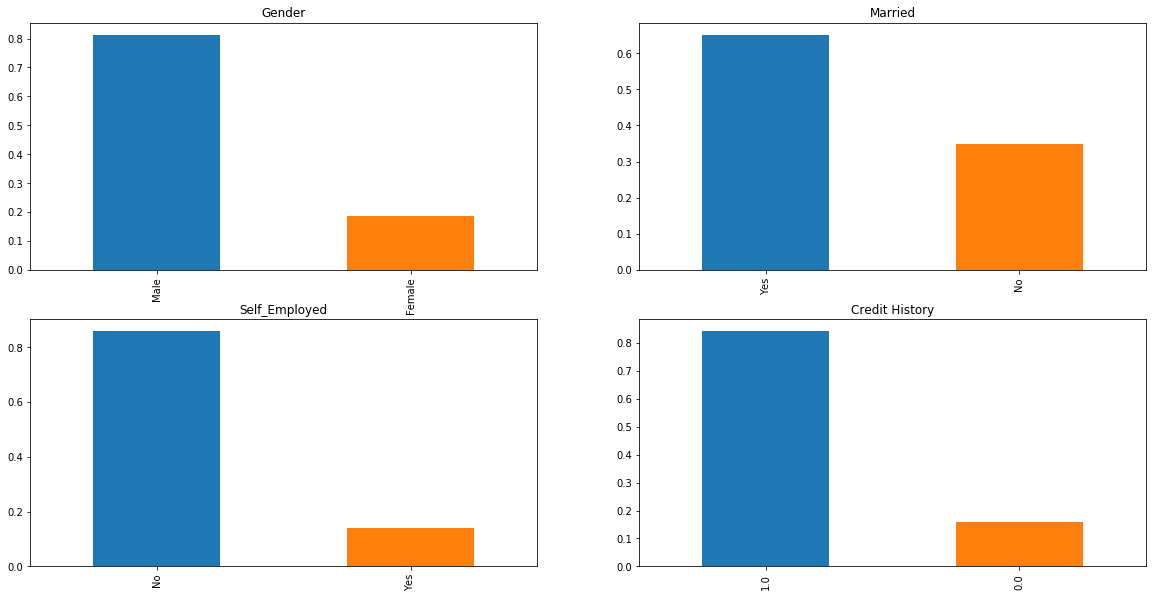

In [11]:
plt.figure(1)
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.show()

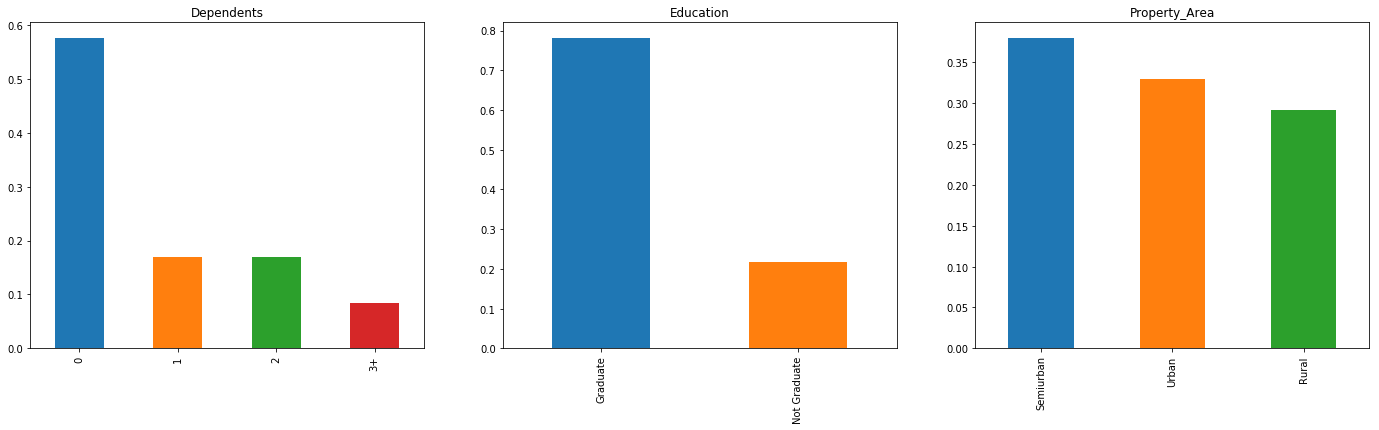

In [12]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

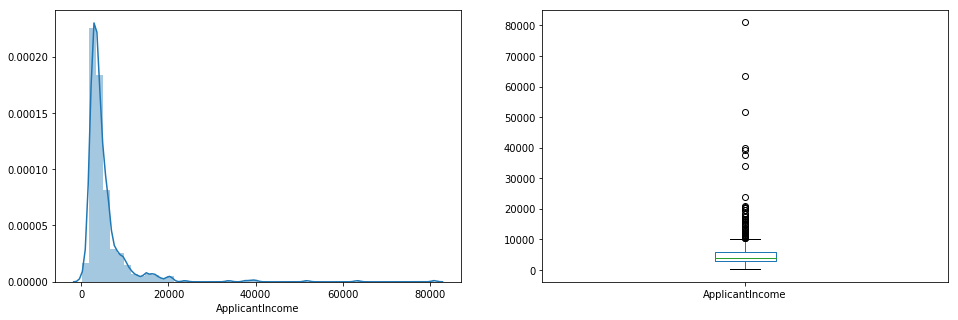

In [13]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(16,5))

Text(0.5,0.98,'')

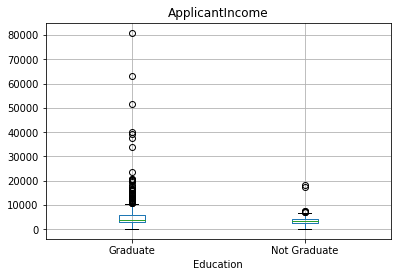

In [14]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

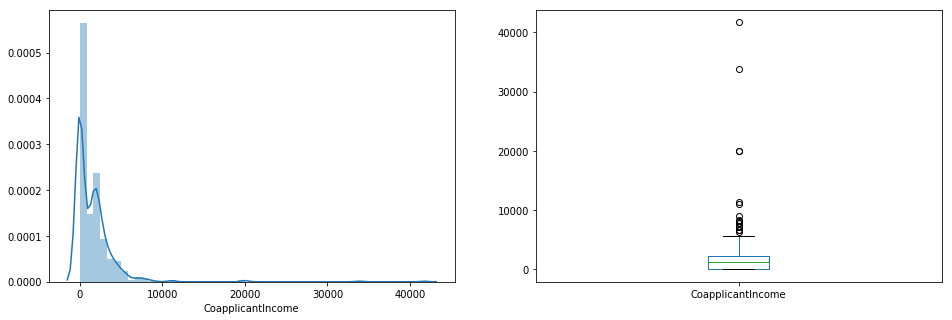

In [15]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

Text(0.5,0.98,'')

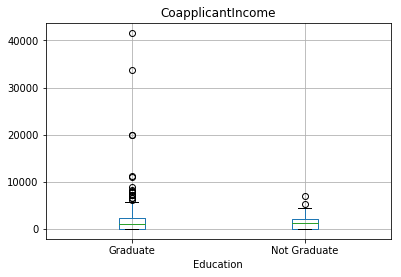

In [16]:
train.boxplot(column='CoapplicantIncome', by = 'Education') 
plt.suptitle("")

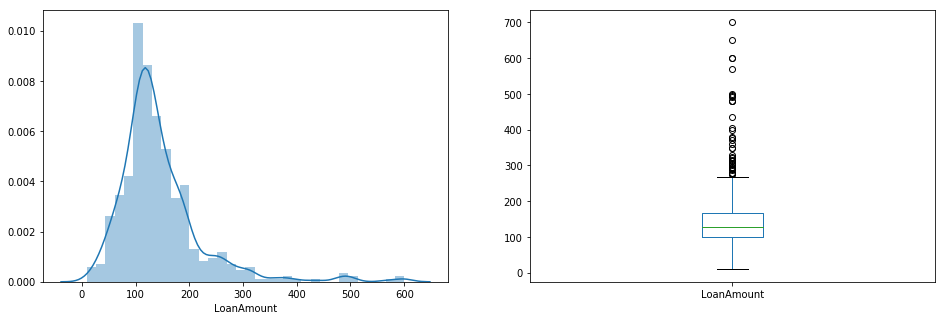

In [17]:
plt.figure(1) 
plt.subplot(121) 
df = train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

Bivariate Analysis

In [18]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status']) 

In [19]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

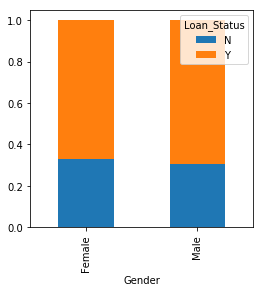

In [20]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [21]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])

In [22]:
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [23]:
Married.sum(1)

Married
No     213
Yes    398
dtype: int64

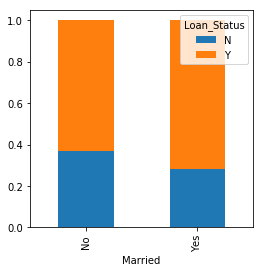

In [24]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked = True, figsize=(4,4))

In [25]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])

In [26]:
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


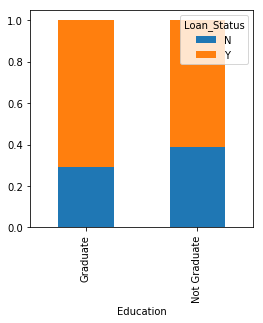

In [27]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize = (4,4))

In [28]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

In [29]:
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


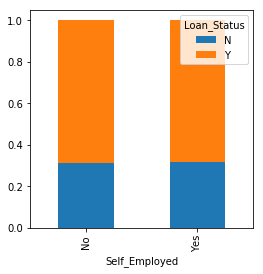

In [30]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [31]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])

In [32]:
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


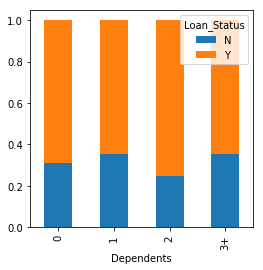

In [33]:
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar', stacked = True, figsize = (4,4))

    Proportion of married applicants is higher for the approved loans.
    Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
    There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

In [34]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])

In [35]:
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


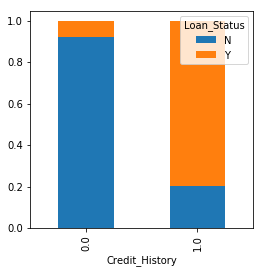

In [36]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True,figsize=(4,4))

In [37]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

In [38]:
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


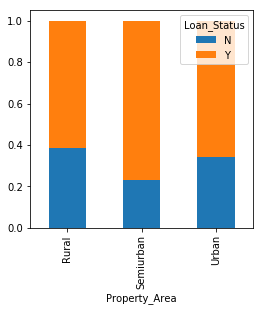

In [39]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

    It seems people with credit history as 1 are more likely to get their loans approved.
    Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

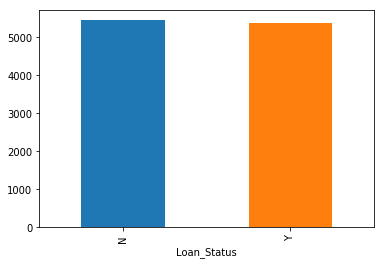

In [40]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [41]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 

In [42]:
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group,include_lowest=True)

In [43]:
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])

In [44]:
Income_bin

Loan_Status,N,Y
Income_bin,,
High,34,74
Average,67,159
Low,45,98
Very high,46,91


([<matplotlib.axis.XTick at 0x7fea46cdd550>,
 <a list of 4 Text xticklabel objects>)

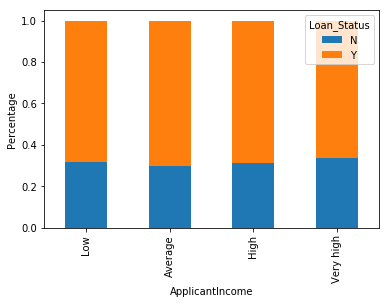

In [45]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')
xi = [i for i in range(0, len(group))]
plt.xticks(xi,group)

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

In [46]:
train['CoapplicantIncome'].std()

2926.2483692241917

In [47]:
bins = [0,1000,3000,42000]

In [48]:
group = ['Low','Average','High']

In [49]:
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group,include_lowest=True)

In [50]:
CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'],train["Loan_Status"])

In [51]:
CoapplicantIncome_bin

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,99,196
Average,61,161
High,32,65


([<matplotlib.axis.XTick at 0x7fea46969400>,
 <a list of 3 Text xticklabel objects>)

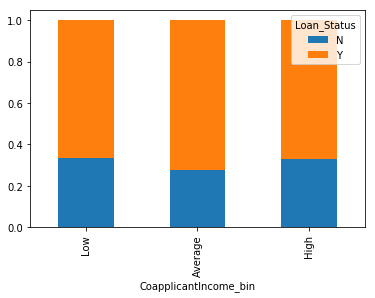

In [52]:
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
xi = [i for i in range(0, len(group))]
plt.xticks(xi,group)

In [53]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [54]:
train['Total_Income'].min()

1442.0

In [55]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 

In [56]:
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group,include_lowest=True)

In [57]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 

In [58]:
Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
High,14,10
Very high,32,87
Average,65,159
Low,81,166


([<matplotlib.axis.XTick at 0x7fea46c87e80>,
 <a list of 4 Text xticklabel objects>)

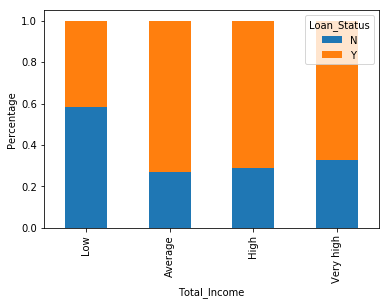

In [59]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
xi = [i for i in range(0, len(group))]
plt.xticks(xi,group)

In [60]:
bins=[0,100,200,700] 
group=['Low','Average','High']

In [61]:
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group,include_lowest=True)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 

In [62]:
LoanAmount_bin

Loan_Status,N,Y
LoanAmount_bin,,
NaN,47,107
Average,103,255
Low,31,49


([<matplotlib.axis.XTick at 0x7fea4652eac8>,
 <a list of 3 Text xticklabel objects>)

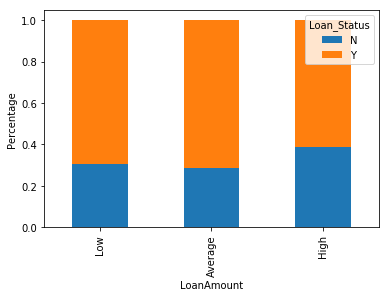

In [63]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')
xi = [i for i in range(0, len(group))]
plt.xticks(xi,group)

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [64]:
train=train.drop(['Income_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

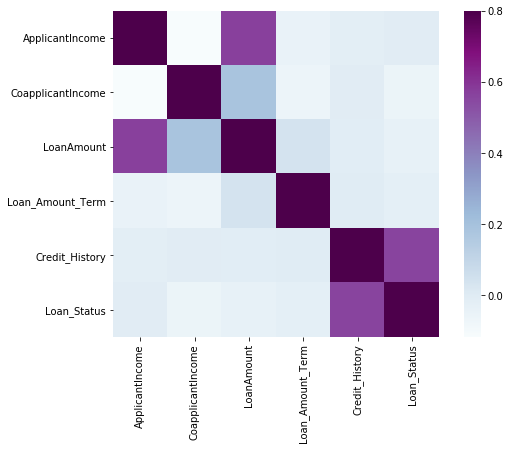

In [65]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

pd.cut try

In [66]:
grades = []
import random
for x in range(10):
  grades.append(random.randint(0,10))
grades

[8, 4, 1, 5, 3, 5, 7, 2, 5, 3]

In [67]:
student = pd.DataFrame({'grade':grades})

In [68]:
bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
student['grade_cat'] = pd.cut(student['grade'], bins=bins, labels=labels,include_lowest=True)

In [69]:
student['grade_cat']

0    excellent
1         poor
2         poor
3       normal
4         poor
5       normal
6    excellent
7         poor
8       normal
9         poor
Name: grade_cat, dtype: category
Categories (3, object): [poor < normal < excellent]

In [70]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode

In [71]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [72]:
train['Gender'].isnull().sum()

0

In [73]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [74]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [75]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [76]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [77]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [78]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [79]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [80]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [82]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [83]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

 Let's examine what can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58

Median = 2.5

Mode = 2

Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode = 2

Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [84]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

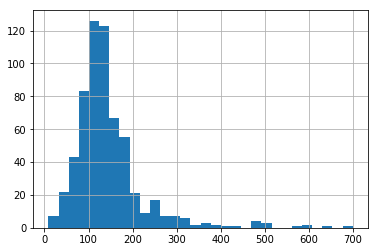

In [85]:
train['LoanAmount'].hist(bins=30)

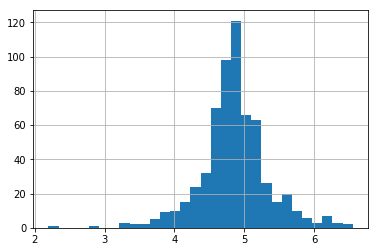

In [86]:
train['LoanAmount_log'].hist(bins=30)

In [87]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

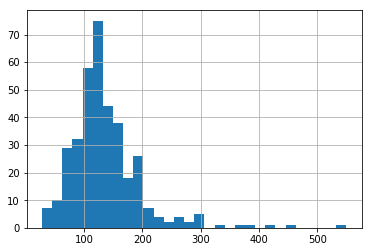

In [88]:
test['LoanAmount'].hist(bins=30)

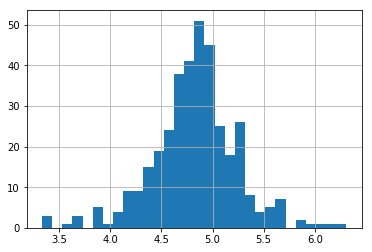

In [89]:
test['LoanAmount_log'].hist(bins=30)

Model Building Part 1

In [90]:
train = train.drop('Loan_ID',axis=1)

In [91]:
test_orignal = test
test = test.drop('Loan_ID',axis=1)

In [92]:
test = pd.get_dummies(test)

In [93]:
x = train.drop('Loan_Status',axis=1)

In [94]:
y = train['Loan_Status']

In [95]:
x = pd.get_dummies(x) 

In [96]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [98]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
pred_cv = model.predict(x_cv)

In [100]:
accuracy_score(y_cv,pred_cv)

0.8108108108108109

In [101]:
pred_test = model.predict(test)

In [102]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [103]:
submission=pd.read_csv("Sample_Submission.csv")

In [104]:
submission['Loan_Status'] = pred_test 
submission['Loan_ID']= test_orignal['Loan_ID']

In [105]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [106]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

In [107]:
logistic =  pd.read_csv('logistic.csv')

In [108]:
from sklearn.model_selection import StratifiedKFold

In [109]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

In [110]:
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [111]:
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

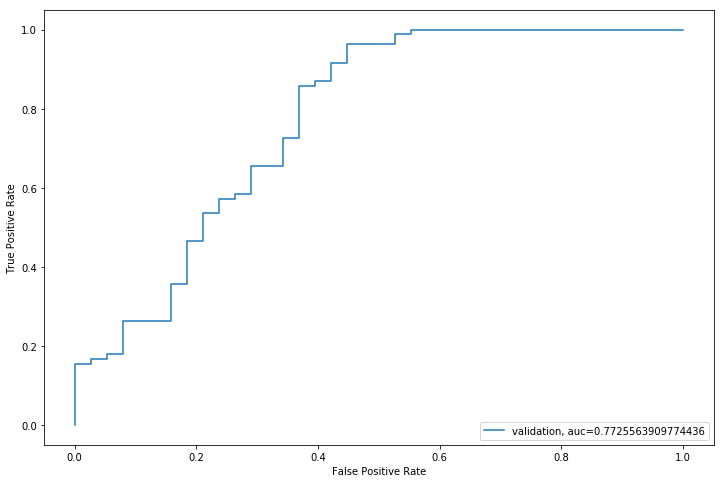

In [112]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [113]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_orignal['Loan_ID']

In [114]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [115]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Stratified_logistic.csv',index=False)

Feature Engineering

In [116]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

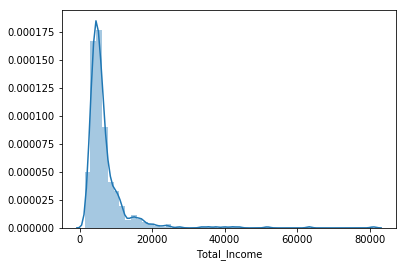

In [117]:
sns.distplot(train['Total_Income']);

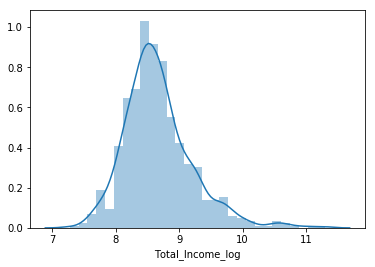

In [118]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [119]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

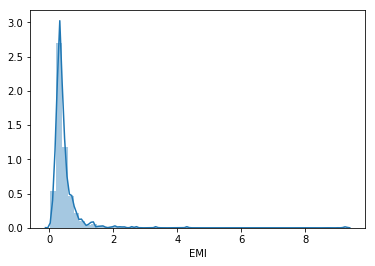

In [120]:
sns.distplot(train['EMI'])

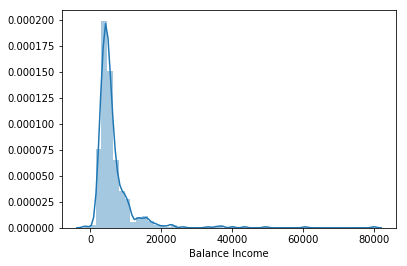

In [121]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income']);

In [122]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [123]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status   

In [124]:
X = pd.get_dummies(X)

In [125]:
i=1 
scores = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.7868852459016393


In [126]:
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

In [127]:
scores

[0.8064516129032258,
 0.8225806451612904,
 0.7786885245901639,
 0.7868852459016393,
 0.7868852459016393]

In [128]:
sum(scores)/len(scores)

0.7962982548915918

In [129]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']

In [130]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [131]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2afterFE.csv',index=False)

Decision Tree

In [132]:
from sklearn import tree

In [133]:
i=1 
scores = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):  
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 



1 of kfold 5
accuracy_score 0.7419354838709677

2 of kfold 5
accuracy_score 0.7580645161290323

3 of kfold 5
accuracy_score 0.680327868852459

4 of kfold 5
accuracy_score 0.6475409836065574

5 of kfold 5
accuracy_score 0.7213114754098361


In [134]:
sum(scores)/len(scores)

0.7098360655737704

In [135]:
pred_test = model.predict(test)

In [136]:
submission['Loan_Status']=pred_test  
submission['Loan_ID']=test_orignal['Loan_ID'] 

In [137]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [138]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv',index=False)

Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
i=1 
scores = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.7338709677419355

3 of kfold 5
accuracy_score 0.7459016393442623

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.7786885245901639


In [141]:
pred_test = model.predict(test)

In [142]:
scores

[0.7903225806451613,
 0.7338709677419355,
 0.7459016393442623,
 0.7786885245901639,
 0.7786885245901639]

In [143]:
sum(scores)/len(scores)

0.7654944473823374

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [146]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [147]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [148]:
grid_search.fit(x_train,y_train)

/home/swati/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
GridSearchCV(cv=None, error_score='raise',       
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            
             max_depth=None, max_features='auto', max_leaf_nodes=None,            
             min_impurity_decrease=0.0, min_impurity_split=None,            
             min_samples_leaf=1, min_samples_split=2,            
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,            
             oob_score=False, random_state=1, verbose=0, warm_start=False),      
             fit_params=None, iid=True, n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 
             'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
             scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [150]:
# Estimating the optimized value 
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            
                                                  max_depth=3, max_features='auto', max_leaf_nodes=None,            
                                                  min_impurity_decrease=0.0, min_impurity_split=None,            
                                                  min_samples_leaf=1, min_samples_split=2,            
                                                  min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            
                                                  oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.


In [151]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
scores = []
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)   
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 
    


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.7786885245901639


In [152]:
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]

In [153]:
scores

[0.8064516129032258,
 0.8306451612903226,
 0.8032786885245902,
 0.7868852459016393,
 0.7786885245901639]

In [154]:
sum(scores)/len(scores)

0.8011898466419884

In [155]:
submission['Loan_Status']=pred_test  
submission['Loan_ID']=test_orignal['Loan_ID']

In [156]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [157]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv',index=False)

Let us find the feature importance now, 
i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

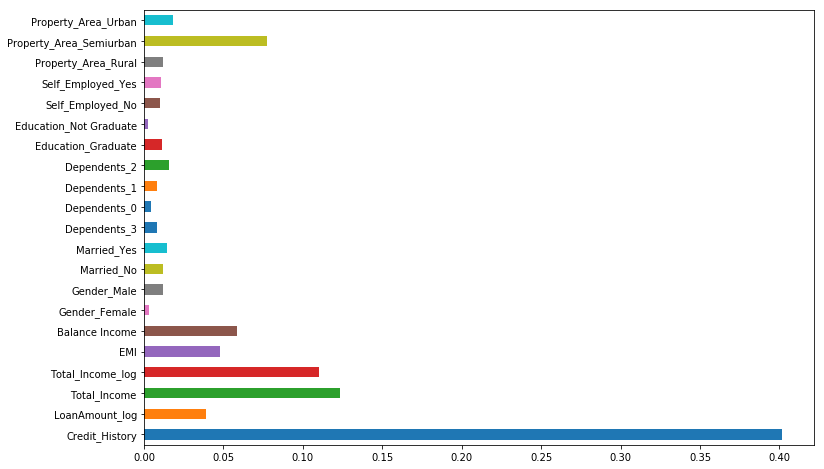

In [158]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

XGBoost

In [159]:
from xgboost import XGBClassifier

In [160]:
i=1 
scores = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)    
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.7868852459016393


In [166]:
test.columns = X.columns

In [167]:
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]

In [168]:
sum(scores)/len(scores)

0.7799841353781068

In [170]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_orignal['Loan_ID']

In [171]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [173]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv',index=False)